Rabbits Modication Project 1

In [3]:
%matplotlib inline

from modsim import *

In [4]:
system = System(t0 = 0, 
                t_end = 30,
                adult_pop0 = 15,
                juvenile_pop0 = 5,
                birth_rate = 0.9,
                mature_rate = 0.33,
                death_rate = 0.5)

system

,value
t0,0.00
t_end,30.00
adult_pop0,15.00
juvenile_pop0,5.00
birth_rate,0.90
mature_rate,0.33
death_rate,0.50


In [5]:
def run_simulation(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    adults = TimeSeries()
    adults[system.t0] = system.adult_pop0
    
    juveniles = TimeSeries()
    juveniles[system.t0] = system.juvenile_pop0
    
   
    for t in linrange(system.t0, system.t_end):
        births = system.birth_rate * adults[t]
        deaths = system.death_rate * adults[t]
        maturations = system.mature_rate * juveniles[t]
        
        if adults[t]> 30:
            market = adults [t]-30   
        else:
            market = 0
        
        adults[t+1] = adults[t] + births - deaths + maturations - market
        juveniles[t+1] = juveniles[t] + births - deaths - maturations
        
        
        
    system.adults = adults
    system.juveniles = juveniles

In [6]:
run_simulation(system)
system.adults

,value
0,15.000000
1,22.650000
2,34.795500
3,48.975285
4,57.571367
5,64.840724
6,71.449869
7,77.533021
8,83.143150
9,88.318680


In [7]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(system.adults, 'bo-', label='adults')
    plot(system.juveniles, 'rs-', label='juveniles')
    decorate(xlabel='Season', 
             ylabel='Rabbit population',
             title=title)

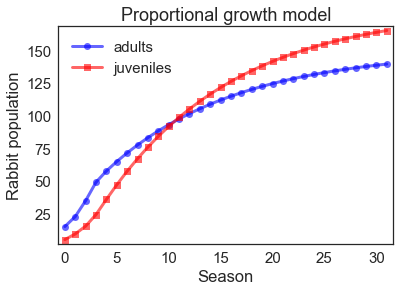

In [8]:
plot_results(system, title='Proportional growth model')